# Results Summary

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results_fm = pd.read_pickle("outputs/results_fm.pkl")
results_fm

,RMSE,Loss,Model,t
0,3.233430,MSE,XGB,2023-05-17 02:22:00
1,3.453014,MSE,XGB,2023-05-19 02:22:00
2,2.760015,MSE,XGB,2023-05-21 02:22:00
3,3.686634,MSE,XGB,2023-05-23 02:22:00
4,4.266778,MSE,XGB,2023-05-25 02:22:00
...,...,...,...,...
162,6.368772,ROS,RF,2024-04-05 02:22:00
163,3.728581,ROS,RF,2024-04-07 02:22:00
164,4.419576,ROS,RF,2024-04-09 02:22:00
165,4.473406,ROS,RF,2024-04-11 02:22:00


In [3]:
results_ros = pd.read_pickle("outputs/results_ros.pkl")
results_ros

,RMSE,Loss,Model,t
0,0.000399,MSE,XGB,2023-05-17 02:22:00
1,0.000427,MSE,XGB,2023-05-19 02:22:00
2,0.000401,MSE,XGB,2023-05-21 02:22:00
3,0.000532,MSE,XGB,2023-05-23 02:22:00
4,0.000575,MSE,XGB,2023-05-25 02:22:00
...,...,...,...,...
162,0.000850,ROS,RF,2024-04-05 02:22:00
163,0.000453,ROS,RF,2024-04-07 02:22:00
164,0.000607,ROS,RF,2024-04-09 02:22:00
165,0.000619,ROS,RF,2024-04-11 02:22:00


In [4]:
# Note, 167*3*12=6012
print(f"Total Time Periods: {len(results_ros.t.unique())}")
print(f"Earliest Train Start Time: {results_ros.t.min()}")
print(f"Latest Train Start Time: {results_ros.t.max()}")
print(f"Total Loss Functions: {len(results_ros.Loss.unique())}")
print(f"Total Models: {len(results_ros.Model.unique())}")
print(f"Total RMSE Calculations: {results_ros.shape[0]}")

Total Time Periods: 167
Earliest Train Start Time: 2023-05-17 02:22:00
Latest Train Start Time: 2024-04-13 02:22:00
Total Loss Functions: 12
Total Models: 3
Total RMSE Calculations: 6012


In [5]:
tab1 = results_ros.groupby('Loss', sort=False)['RMSE'].mean().reset_index()
tab1.rename(columns={'RMSE': 'Mean'})

,Loss,Mean
0,MSE,0.000553
1,exp_0.01,0.000551
2,exp_0.0367,0.000548
3,exp_0.0633,0.000550
4,exp_0.09,0.000554
5,exp_0.1167,0.000562
6,exp_0.1433,0.000573
7,exp_0.17,0.000586
8,exp_0.1967,0.000601
9,exp_0.2233,0.000617


In [6]:
pd.options.display.float_format = '{:.3e}'.format

In [7]:
tab1 = results_ros.groupby('Loss', sort=False).agg(
    Mean=('RMSE', 'mean'),
    Min=('RMSE', 'min'),
    Max=('RMSE', 'max')
).reset_index()
tab1

,Loss,Mean,Min,Max
0,MSE,5.533e-04,2.325e-04,1.022e-03
1,exp_0.01,5.511e-04,2.423e-04,1.030e-03
2,exp_0.0367,5.477e-04,2.341e-04,1.054e-03
3,exp_0.0633,5.496e-04,2.214e-04,1.091e-03
4,exp_0.09,5.544e-04,2.165e-04,1.128e-03
5,exp_0.1167,5.615e-04,2.177e-04,1.182e-03
6,exp_0.1433,5.730e-04,2.138e-04,1.197e-03
7,exp_0.17,5.865e-04,2.112e-04,1.227e-03
8,exp_0.1967,6.010e-04,2.151e-04,1.255e-03
9,exp_0.2233,6.172e-04,2.099e-04,1.301e-03


In [8]:
print(tab1.to_latex(float_format='%.3e'))

\begin{tabular}{llrrr}
\toprule
 & Loss & Mean & Min & Max \\
\midrule
0 & MSE & 5.533e-04 & 2.325e-04 & 1.022e-03 \\
1 & exp_0.01 & 5.511e-04 & 2.423e-04 & 1.030e-03 \\
2 & exp_0.0367 & 5.477e-04 & 2.341e-04 & 1.054e-03 \\
3 & exp_0.0633 & 5.496e-04 & 2.214e-04 & 1.091e-03 \\
4 & exp_0.09 & 5.544e-04 & 2.165e-04 & 1.128e-03 \\
5 & exp_0.1167 & 5.615e-04 & 2.177e-04 & 1.182e-03 \\
6 & exp_0.1433 & 5.730e-04 & 2.138e-04 & 1.197e-03 \\
7 & exp_0.17 & 5.865e-04 & 2.112e-04 & 1.227e-03 \\
8 & exp_0.1967 & 6.010e-04 & 2.151e-04 & 1.255e-03 \\
9 & exp_0.2233 & 6.172e-04 & 2.099e-04 & 1.301e-03 \\
10 & exp_0.25 & 6.364e-04 & 2.194e-04 & 1.381e-03 \\
11 & ROS & 5.484e-04 & 2.219e-04 & 1.085e-03 \\
\bottomrule
\end{tabular}



In [9]:
min_ros = tab1.Mean.argmin()
print(tab1.Loss[min_ros])
(tab1.Mean[0] - tab1.Mean[min_ros]) / tab1.Mean[0]

exp_0.0367


0.010187544324094118

In [10]:
from scipy import stats
stats.ttest_ind(results_ros[results_ros.Loss == "MSE"].RMSE, results_ros[results_ros.Loss == "exp_0.0367"].RMSE)

TtestResult(statistic=0.6060663432598155, pvalue=0.5446082406021743, df=1000.0)

In [11]:
stats.ttest_ind(results_fm[results_ros.Loss == "MSE"].RMSE, results_fm[results_ros.Loss == "exp_0.0367"].RMSE)

TtestResult(statistic=0.17441494316938397, pvalue=0.8615746747974325, df=1000.0)

In [12]:
pd.options.display.float_format = None

In [13]:
tab2 = results_fm.groupby('Loss', sort=False).agg(
    Mean=('RMSE', 'mean'),
    Min=('RMSE', 'min'),
    Max=('RMSE', 'max')
).reset_index()
tab2.round(2)

,Loss,Mean,Min,Max
0,MSE,3.95,1.86,7.48
1,exp_0.01,3.94,1.82,7.65
2,exp_0.0367,3.94,1.79,8.10
3,exp_0.0633,3.99,1.81,8.53
4,exp_0.09,4.07,1.70,8.92
5,exp_0.1167,4.16,1.64,9.25
6,exp_0.1433,4.30,1.58,9.53
7,exp_0.17,4.45,1.58,9.85
8,exp_0.1967,4.60,1.55,10.28
9,exp_0.2233,4.77,1.51,10.64


In [14]:
#print(tab2.to_latex())

## Plots

In [15]:
# grouped = results_ros.groupby('Loss').agg({'RMSE': ['mean', 'sem']}).reset_index()
# grouped

grouped = results_fm.groupby('Loss', sort=False).agg(
    Mean=('RMSE', 'mean'),
    SE=('RMSE', 'sem')
).reset_index()
grouped2 = results_ros.groupby('Loss', sort=False).agg(
    Mean=('RMSE', 'mean'),
    SE=('RMSE', 'sem')
).reset_index()

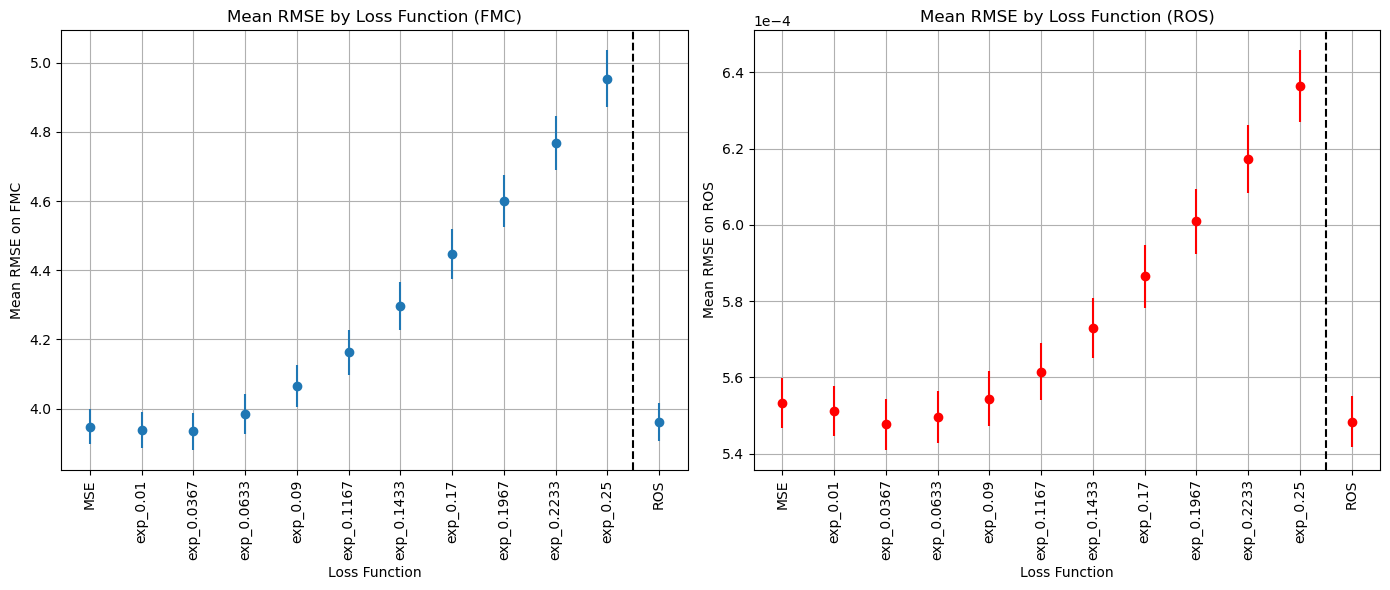

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
ax1 = axes[0]
ax1.errorbar(grouped.Loss, grouped.Mean, yerr=grouped.SE, fmt='o', label='SE')
# plt.errorbar(tab1.Loss, tab1.Mean, yerr=[tab1.Mean[i] - tab1.Max[i] for i in range(len(tab1.Loss))], fmt='o', label='Min')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.set_xlabel('Loss Function')
ax1.set_ylabel('Mean RMSE on FMC')
ax1.set_title('Mean RMSE by Loss Function (FMC)')
ax1.tick_params(axis='x', rotation=90)
ax1.axvline(x=10.5, color='black', linestyle='--')
ax1.grid()

ax2 = axes[1]
ax2.errorbar(grouped2.Loss, grouped2.Mean, yerr=grouped2.SE, fmt='o', label='SE', color='r')
# plt.errorbar(tab1.Loss, tab1.Mean, yerr=[tab1.Mean[i] - tab1.Max[i] for i in range(len(tab1.Loss))], fmt='o', label='Min')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.set_xlabel('Loss Function')
ax2.set_ylabel('Mean RMSE on ROS')
ax2.set_title('Mean RMSE by Loss Function (ROS)')
ax2.tick_params(axis='x', rotation=90)
ax2.axvline(x=10.5, color='black', linestyle='--')
ax2.grid()

plt.tight_layout()
plt.savefig('outputs/results1.png')
plt.show()

In [17]:
models_vec = results_ros.Model.unique()

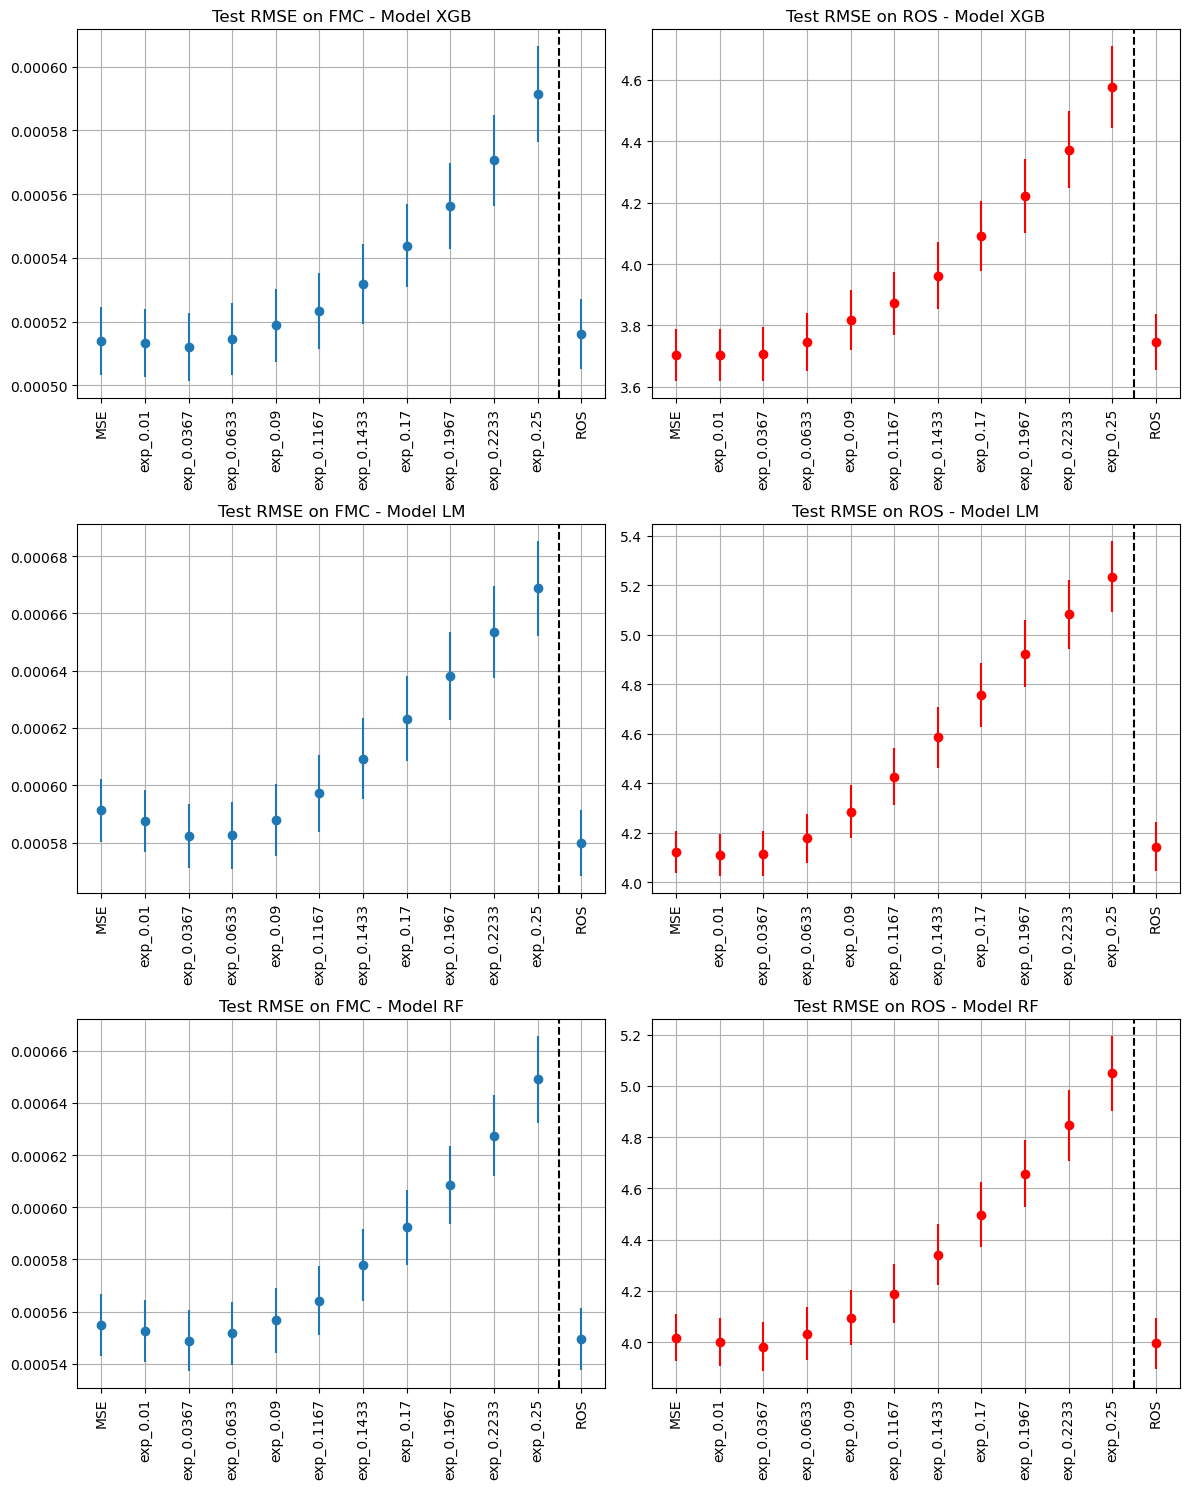

In [18]:
N = len(models_vec) # number of rows of subplots
fig, axes = plt.subplots(N, 2, figsize=(12, 5*N))

for i in range(0, len(models_vec)):
    mod = models_vec[i]
    temp = results_ros[results_ros.Model == mod]
    temp2 = temp.groupby('Loss', sort=False).agg(
        Mean=('RMSE', 'mean'),
        SE=('RMSE', 'sem')
    ).reset_index()
    # Access the subplot at row i, column 0
    ax1 = axes[i, 0]
    # ax1.scatter(temp2.Loss, temp2.Mean)
    ax1.errorbar(temp2.Loss, temp2.Mean, yerr=temp2.SE, fmt='o', label='SE')
    ax1.tick_params(axis='x', rotation=90)
    ax1.set_title(f'Test RMSE on FMC - Model {mod}')
    ax1.axvline(x=10.5, color='black', linestyle='--')
    ax1.grid()

    temp = results_fm[results_fm.Model == mod]
    temp2 = temp.groupby('Loss', sort=False).agg(
        Mean=('RMSE', 'mean'),
        SE=('RMSE', 'sem')
    ).reset_index()
    # Access the subplot at row i, column 0
    ax2 = axes[i, 1]
    ax2.errorbar(temp2.Loss, temp2.Mean, yerr=temp2.SE, fmt='o', label='SE', color='r')
    ax2.tick_params(axis='x', rotation=90)
    ax2.set_title(f'Test RMSE on ROS - Model {mod}')
    ax2.axvline(x=10.5, color='black', linestyle='--')
    ax2.grid()

plt.tight_layout()
plt.savefig('outputs/results2.png')
plt.show()